In [14]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.Collecting xgboost
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 1.0/124.9 MB 6.3 MB/s eta 0:00:20
    --------------------------------------- 2.4/124.9 MB 6.1 MB/s eta 0:00:21
   - -------------------------------------- 3.7/124.9 MB 6.1 MB/s eta 0:00:21
   - -------------------------------------- 5.0/124.9 MB 6.0 MB/s eta 0:00:20
   -- ------------------------------------- 6.3/124.9 MB 5.9 MB/s eta 0:00:20
   -- ------------------------------------- 7.6/124.9 MB 5.9 MB/s eta 0:00:20
   -- ------------------------------------- 8.9/124.9 MB 6.0 MB/s eta 0:00:20
   --- ------------------------------------ 10.2/124.9 MB 6.0 MB/s eta 0:00:20
   --- ------------------------------------ 11.5/124.9 MB 6.0 MB/s eta 0:00:20
   ---- ----------------------------------- 12.8/124.9 MB 6.0 MB/s eta 0:00:19
   ---- ----------------------------------- 14.2/124.9 MB 6.0 

In [16]:
#importing necessary libraries
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

In [18]:
#loading the dataset
train_data=joblib.load('encoded_train_data.joblib',mmap_mode='r')
test_data=joblib.load('encoded_test_data.joblib',mmap_mode='r')

In [20]:
#create X and y
X=train_data.drop('IncidentGrade',axis=1)
y=train_data['IncidentGrade'] 

#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Comparing  Machine learning models

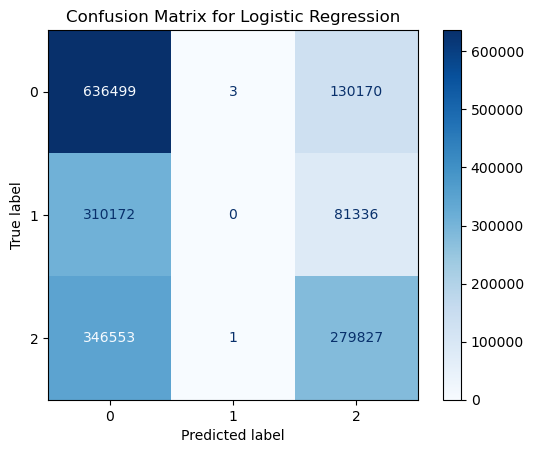

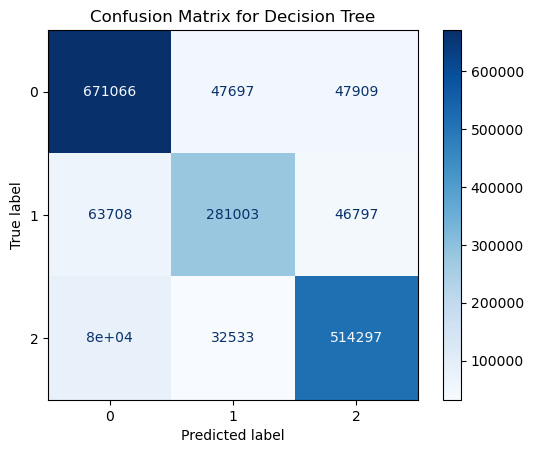

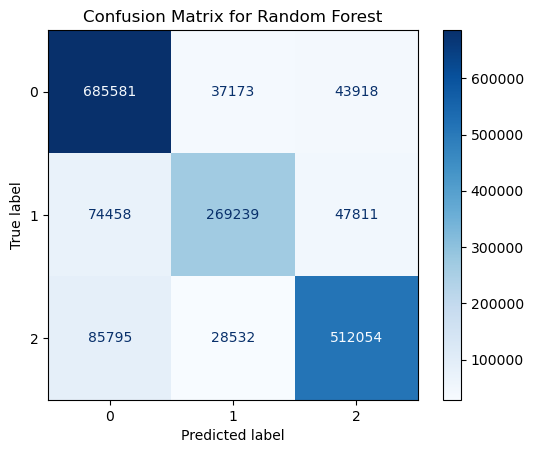

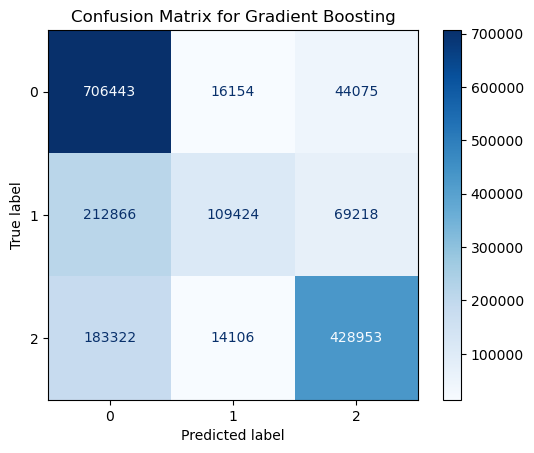

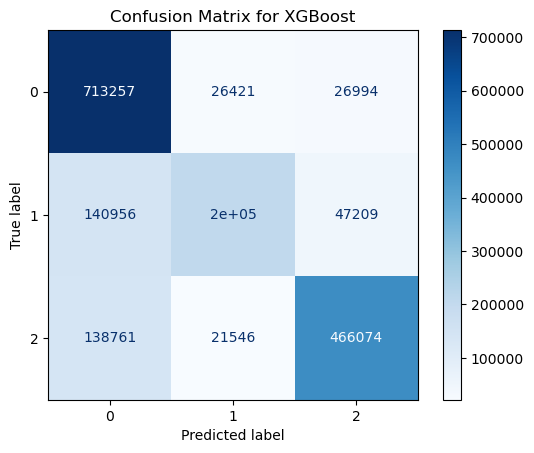

Model Comparison:
                  Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.513474   0.411351  0.513474  0.441248
1        Decision Tree  0.821696   0.821111  0.821696  0.820748
2        Random Forest  0.821980   0.822243  0.821980  0.820139
3    Gradient Boosting  0.697550   0.724773  0.697550  0.672777
4              XGBoost  0.774798   0.788898  0.774798  0.767523

Best Model based on F1 Score:
Model        Decision Tree
Accuracy          0.821696
Precision         0.821111
Recall            0.821696
F1 Score          0.820748
Name: 1, dtype: object


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

# Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000,random_state=42),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100,random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100,n_jobs=-1,random_state=42)
}

# Subsample the training data for faster experimentation (e.g., 20% of the data)
X_train_sample = X_train.sample(frac=0.1, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

# Initialize a dictionary to store results
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model on the subsample
    model.fit(X_train_sample, y_train_sample)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Append results to the dictionary
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)
    
    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Convert results to a DataFrame for comparison
results_df = pd.DataFrame(results)
print("Model Comparison:\n", results_df)

# Find and print the best model based on F1 Score (or change to another metric if preferred)
best_model = results_df.loc[results_df['F1 Score'].idxmax()]
print("\nBest Model based on F1 Score:")
print(best_model)


In [25]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
import pandas as pd

# Sample the data (use 10% for faster processing)
X_sample, _, y_sample, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)

# Define smaller parameter grids
param_grid_dt = {
    'max_depth': [5, 10, 15], 
    'min_samples_split': [2, 5],
}

param_distributions_rf = {
    'n_estimators': randint(50, 150),
    'max_depth': [10, None],
    'min_samples_split': randint(2, 5),
}

# Initialize models
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# GridSearchCV on Decision Tree
grid_search_dt = GridSearchCV(
    estimator=dt, 
    param_grid=param_grid_dt, 
    scoring='f1', 
    cv=3,
    n_jobs=-1
)
grid_search_dt.fit(X_sample, y_sample)
best_dt = grid_search_dt.best_estimator_

# RandomizedSearchCV on Random Forest
random_search_rf = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_distributions_rf, 
    n_iter=10,  # Fewer iterations
    scoring='f1', 
    cv=3,
    n_jobs=-1, 
    random_state=42
)
random_search_rf.fit(X_sample, y_sample)
best_rf = random_search_rf.best_estimator_

# Print results
print("Best Decision Tree parameters:", grid_search_dt.best_params_)
print("Best Random Forest parameters:", random_search_rf.best_params_)


Best Decision Tree parameters: {'max_depth': 5, 'min_samples_split': 2}
Best Random Forest parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 64}


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Assuming X_test and y_test are already defined as the test dataset

# Define a function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted')
    }

# Evaluate both models
dt_metrics = evaluate_model(best_dt, X_test, y_test)
rf_metrics = evaluate_model(best_rf, X_test, y_test)

# Create a DataFrame to compare
metrics_df = pd.DataFrame([dt_metrics, rf_metrics], index=['Decision Tree', 'Random Forest'])

# Display the comparison
print("Model Comparison:\n", metrics_df)

# Determine the best model based on F1 score
best_model_name = metrics_df['F1 Score'].idxmax()
best_model_metrics = metrics_df.loc[best_model_name]

# Print the best model's metrics
print(f"\nBest Model based on F1 Score:\n{best_model_name}\n", best_model_metrics)


Model Comparison:
                Accuracy  Precision    Recall  F1 Score
Decision Tree  0.658427   0.701238  0.658427  0.622497
Random Forest  0.701886   0.743700  0.701886  0.675624

Best Model based on F1 Score:
Random Forest
 Accuracy     0.701886
Precision    0.743700
Recall       0.701886
F1 Score     0.675624
Name: Random Forest, dtype: float64


In [29]:
# Loading the encoded train data
train_data = joblib.load('encoded_train_data.joblib', mmap_mode='r')

# Separating the features (X) and target variable (y)
X = train_data.drop('IncidentGrade', axis=1)
y = train_data['IncidentGrade']

X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna(axis=1)

# Splitting the data (80:20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Downsampling the training data to 2% for quicker processing
X_train_sampled, _, y_train_sampled, _ = train_test_split(X_train, y_train, train_size=0.02, stratify=y_train, random_state=42)

if X_train_sampled.select_dtypes(include=['bool']).shape[1] > 0:
    X_train_sampled = X_train_sampled.astype(int)

# Applying SMOTE for multi-class classification (default strategy balances all classes equally)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_sampled, y_train_sampled)

# Hyperparameters for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 75],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=5,
                                   cv=3, verbose=1, random_state=42, n_jobs=-1)

# Fitting the Randomized Search with resampled training data
random_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and model
best_rf = random_search.best_estimator_

# Evaluating on validation data
y_pred = best_rf.predict(X_val)

# Printing the results
print("Best Hyperparameters:", random_search.best_params_)
print("Classification Report:")
print(classification_report(y_val, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

# Saving the tuned model
joblib.dump(best_rf, "rf_smote_tuned_model.joblib")
print("Model saved as rf_smote_tuned_model.joblib")

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters: {'n_estimators': 75, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80    765560
           1       0.67      0.66      0.66    390976
           2       0.81      0.77      0.79    628025

    accuracy                           0.77   1784561
   macro avg       0.75      0.75      0.75   1784561
weighted avg       0.77      0.77      0.77   1784561

Confusion Matrix:
[[630097  73942  61521]
 [ 86187 256482  48307]
 [ 95435  50572 482018]]
Model saved as rf_smote_tuned_model.joblib


Evaluate model on test data

In [31]:
# Loading the saved Random Forest model
best_rf = joblib.load("rf_smote_tuned_model.joblib")

# Loading the test dataset
test_data = joblib.load('encoded_test_data.joblib', mmap_mode='r')

# Loading the training dataset to get the correct feature columns
train_data = joblib.load('encoded_train_data.joblib', mmap_mode='r')
X_train = train_data.drop('IncidentGrade', axis=1)

# Separateing the features and target from test data
X_test = test_data.drop('IncidentGrade', axis=1)  
y_test = test_data['IncidentGrade']

# Reindexing the test data to match the training data columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Makeing predictions on the test data
y_test_pred = best_rf.predict(X_test)

# Evaluateing the saved model on the test data
print("\nClassification Report on Test Data:")
report = classification_report(y_test, y_test_pred, output_dict=True)
print(classification_report(y_test, y_test_pred))

macro_f1 = report['macro avg']['f1-score']
macro_precision = report['macro avg']['precision']
macro_recall = report['macro avg']['recall']

print("\nMacro-F1 Score: {:.2f}".format(macro_f1))
print("Macro Precision: {:.2f}".format(macro_precision))
print("Macro Recall: {:.2f}".format(macro_recall))
print("\nConfusion Matrix on Test Data:")
print(confusion_matrix(y_test, y_test_pred))


Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      1670
           1       0.57      0.55      0.56       867
           2       0.76      0.70      0.73      1455

    accuracy                           0.69      3992
   macro avg       0.68      0.67      0.67      3992
weighted avg       0.69      0.69      0.69      3992


Macro-F1 Score: 0.67
Macro Precision: 0.68
Macro Recall: 0.67

Confusion Matrix on Test Data:
[[1268  211  191]
 [ 262  478  127]
 [ 283  157 1015]]
